<u>

# <span style="color: lightblue; border-bottom: 2px solid lightblue;">**Introduction to Data Science Project**



### **Gal Shmuel & Rachel Yeholashet**

#### **Horse Racing**

### **Installing features**


In [ ]:
# Installing the Kaggle package
!pip install kaggle
!pip install sklearn.metrics
!pip install plotly
!pip install -U kaleido
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install matplotlib.colors



ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00


### **Imports all together**

In [ ]:
import os
import json
import zipfile
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import plotly.express as px



In [ ]:
# Define the path to the token file
token_file_path = 'kaggle.json'
#print(os.getcwd())

# Read the JSON file and load its contents
with open(token_file_path, 'r') as file:
    kaggle_token = json.load(file)

# Set the Kaggle API credentials in the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']

# Now you can use Kaggle API
# For example, to list the datasets you can use the Kaggle API command
# !kaggle datasets list

### [Horsing Racing](https://www.kaggle.com/datasets/hwaitt/horse-racing?select=races_1990.csv)


In [ ]:
# Make sure your kaggle.json file is present in the appropriate directory (usually ~/.kaggle/)
# Replace 'hwaitt/horse-racing' with the dataset owner and dataset name/
!kaggle datasets download -d hwaitt/horse-racing -p ./datasets/horse-racing

# Navigate to the dataset directory
%cd ./datasets/horse-racing

# Specify the path to the downloaded zip file
zip_file = './horse-racing.zip'

# Specify the directory where you want to extract the files
extract_dir = './'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory to verify extraction
os.listdir(extract_dir)


Dataset URL: https://www.kaggle.com/datasets/hwaitt/horse-racing
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 236M/236M [00:11<00:00, 23.6MB/s]
100% 236M/236M [00:11<00:00, 20.8MB/s]
/content/datasets/horse-racing


['races_2010.csv',
 'races_2019.csv',
 'horses_1999.csv',
 'horses_2006.csv',
 'races_1993.csv',
 'races_1994.csv',
 'races_2006.csv',
 'horses_1990.csv',
 'races_2002.csv',
 'horses_2009.csv',
 'horses_2014.csv',
 'races_2012.csv',
 'horses_1991.csv',
 'races_2007.csv',
 'horses_1997.csv',
 'horse-racing.zip',
 'races_1997.csv',
 'races_2016.csv',
 'races_1990.csv',
 'horses_1994.csv',
 'horses_2007.csv',
 'horses_2003.csv',
 'horses_1996.csv',
 'races_2013.csv',
 'races_2017.csv',
 'races_1992.csv',
 'horses_2002.csv',
 'races_2004.csv',
 'forward.csv',
 'horses_2020.csv',
 'horses_2013.csv',
 'horses_2016.csv',
 'races_2018.csv',
 'races_2014.csv',
 'races_2020.csv',
 'horses_2018.csv',
 'races_2001.csv',
 'horses_2017.csv',
 'horses_2015.csv',
 'horses_1998.csv',
 'races_1996.csv',
 'horses_2010.csv',
 'horses_1993.csv',
 'horses_2005.csv',
 'races_2003.csv',
 'horses_2001.csv',
 'horses_2000.csv',
 'races_2009.csv',
 'races_2008.csv',
 'races_1999.csv',
 'races_2000.csv',
 'races_

## **Converting data (Function) - miles to km**


This function converts the distance frome miles,furlongs to KM!


In [ ]:


# Function to normalize the distance string
def normalize_distance_string(distance_str):
    # Replace common encoding issues with the correct character
    return distance_str.replace('Â½', '½')

# Function to convert distance to kilometers
def convert_distance(distance_str):
    # Normalize the distance string
    distance_str = normalize_distance_string(distance_str)

    # Function to convert fractional furlongs
    def parse_fraction(fraction_str):
        if '½' in fraction_str:
            return 0.5
        return float(fraction_str)

    # Extract miles and furlongs using regular expressions
    miles_match = re.search(r'(\d+)m', distance_str)
    furlongs_match = re.search(r'(\d+½?)f', distance_str)

    miles = int(miles_match.group(1)) if miles_match else 0
    furlongs = 0
    if furlongs_match:
        furlongs_str = furlongs_match.group(1).replace('f', '')
        if '½' in furlongs_str:
            furlongs_parts = furlongs_str.split('½')
            furlongs = int(furlongs_parts[0]) + parse_fraction('½')
        else:
            furlongs = int(furlongs_str)

    # Convert furlongs to miles (1 furlong = 1/8 mile)
    total_miles = miles + (furlongs / 8.0)

    # Convert miles to kilometers (1 mile = 1.60934 km)
    km = total_miles * 1.60934
    return km





## **Reading from csv files : races 1990 - 2020**

In [ ]:

# Define the range of years
years = range(1990, 2020 + 1)

# List to store DataFrames for each file
df_races = []

# Define the columns to extract for races
columns_to_extract_races = ['rid', 'course', 'time', 'title', 'ages','date', 'distance','countryCode', 'condition', 'hurdles', 'winningTime']

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = os.path.join(os.getcwd(), f"races_{year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Extract specific columns
        extracted_df = df[columns_to_extract_races]
        # Convert 'date' column to year
        extracted_df['date'] = year

        df_races.append(extracted_df)
    else:
        print(f"File for year {year} does not exist.")

# Print extracted data for each year
for i, df in enumerate(df_races):
    print(f"Extracted data from year {1990 + i}:")



<ipython-input-6-636715cd6c25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['date'] = year
<ipython-input-6-636715cd6c25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['date'] = year
<ipython-input-6-636715cd6c25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Extracted data from year 1990:
Extracted data from year 1991:
Extracted data from year 1992:
Extracted data from year 1993:
Extracted data from year 1994:
Extracted data from year 1995:
Extracted data from year 1996:
Extracted data from year 1997:
Extracted data from year 1998:
Extracted data from year 1999:
Extracted data from year 2000:
Extracted data from year 2001:
Extracted data from year 2002:
Extracted data from year 2003:
Extracted data from year 2004:
Extracted data from year 2005:
Extracted data from year 2006:
Extracted data from year 2007:
Extracted data from year 2008:
Extracted data from year 2009:
Extracted data from year 2010:
Extracted data from year 2011:
Extracted data from year 2012:
Extracted data from year 2013:
Extracted data from year 2014:
Extracted data from year 2015:
Extracted data from year 2016:
Extracted data from year 2017:
Extracted data from year 2018:
Extracted data from year 2019:
Extracted data from year 2020:


<ipython-input-6-636715cd6c25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['date'] = year
<ipython-input-6-636715cd6c25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['date'] = year


## **Taking all df_races and puting it in ONE data frame**

In [ ]:
races_data = pd.concat(df_races, ignore_index=True)
races_data['distanceKM'] = races_data['distance'].apply(convert_distance)
races_data

,rid,course,time,title,ages,date,distance,countryCode,condition,hurdles,winningTime,distanceKM
0,271018,Exeter,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
1,275156,Tramore (IRE),02:00,Tattersalls Mares E.B.F. Novice Chase,NaN,1990,2m,IE,Soft,12 fences,267.00,3.218680
2,282203,Catterick,02:45,Scotch Corner Handicap Chase,NaN,1990,1m7½f,GB,Good To Firm,12 fences,238.00,3.118096
3,298761,Cheltenham,02:30,A. S. W. Handicap Hurdle,NaN,1990,2m,GB,Good To Firm,NaN,243.80,3.218680
4,301118,Windsor,03:30,Touchen End Handicap Hurdle,NaN,1990,2m6f,GB,Good,NaN,330.70,4.425685
...,...,...,...,...,...,...,...,...,...,...,...,...
396567,415086,Hanshin (JPN),06:45,Challenge Cup (Grade 3) (3yo+) (Turf),3yo+,2020,1m2f,JP,Firm,NaN,119.90,2.011675
396568,415087,Los Alamitos (USA),10:30,Starlet Stakes (Grade 1) (2yo Fillies) (Main T...,2yo,2020,1m½f,US,Fast,NaN,104.53,1.609340
396569,415088,Nakayama (JPN),06:25,Sports Nippon Sho Stayers Stakes (Grade 2) (3y...,3yo+,2020,2m2f,JP,Good,NaN,232.00,3.621015
396570,415089,Tampa Bay Downs (USA),05:10,Maiden Claiming Race (2yo) (Turf),2yo,2020,1m,US,Firm,NaN,99.34,1.609340


## **Reading from csv files : horses 1990 - 2020**

In [ ]:

# Define the range of years
years = range(1990, 2020 + 1)

# List to store DataFrames for each file
df_horse = []

# Define the columns to extract
columns_to_extract = ['rid', 'horseName', 'age', 'isFav', 'trainerName', 'jockeyName', 'position','decimalPrice','saddle', 'positionL', 'weight']

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = os.path.join(os.getcwd(), f"horses_{year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        # Extract specific columns
        extracted_df = df[columns_to_extract]
        df_horse.append(extracted_df)
    else:
        print(f"File for year {year} does not exist.")

# Print extracted data for each year
for i, df in enumerate(df_horse):
    print(f"Extracted data from year {1990 + i}:")

# If you want to store the extracted data back in df_horse, it's already done during extraction



<ipython-input-8-531593c09150>:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Extracted data from year 1990:
Extracted data from year 1991:
Extracted data from year 1992:
Extracted data from year 1993:
Extracted data from year 1994:
Extracted data from year 1995:
Extracted data from year 1996:
Extracted data from year 1997:
Extracted data from year 1998:
Extracted data from year 1999:
Extracted data from year 2000:
Extracted data from year 2001:
Extracted data from year 2002:
Extracted data from year 2003:
Extracted data from year 2004:
Extracted data from year 2005:
Extracted data from year 2006:
Extracted data from year 2007:
Extracted data from year 2008:
Extracted data from year 2009:
Extracted data from year 2010:
Extracted data from year 2011:
Extracted data from year 2012:
Extracted data from year 2013:
Extracted data from year 2014:
Extracted data from year 2015:
Extracted data from year 2016:
Extracted data from year 2017:
Extracted data from year 2018:
Extracted data from year 2019:
Extracted data from year 2020:


<ipython-input-8-531593c09150>:14: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## **taking all df_horse and puting it in ONE data frame**

In [ ]:
# Concatenate all DataFrames into a single DataFrame for analysis
horses_data = pd.concat(df_horse, ignore_index=True)
horses_data

,rid,horseName,age,isFav,trainerName,jockeyName,position,decimalPrice,saddle,positionL,weight
0,271018,Combermere,6.0,0,R G Frost,J Frost,1,0.222222,0.0,NaN,69
1,271018,Royal Battery,6.0,0,D H Barons,S Earle,2,0.090909,0.0,10,69
2,271018,Just So,7.0,0,J D Roberts,S Burrough,3,0.029412,0.0,15,66
3,271018,Mandraki Shuffle,8.0,0,Oliver Sherwood,M Richards,4,0.090909,0.0,20,69
4,271018,Turnberry Dawn,8.0,0,T B Hallett,P Richards,5,0.047619,0.0,dist,69
...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,0,Roydon Bergerson,Hazel Schofer,7,0.030303,6.0,shd,58
4107311,415090,Aimee's Jewel,4.0,0,Trudy Keegan,Lisa Allpress,8,0.153846,11.0,.5,57
4107312,415090,Times Ticking,5.0,0,Alby Macgregor,Jonathan Riddell,9,0.044053,8.0,hd,58
4107313,415090,Shadows Cast,8.0,0,Mark Oulaghan,Johnathan Parkes,10,0.041152,3.0,1,58


## **Merging horses_data & races_data**



In [ ]:
# Merge on 'rid' column
merged_data = pd.merge(horses_data, races_data, on='rid')
merged_data

,rid,horseName,age,isFav,trainerName,jockeyName,position,decimalPrice,saddle,positionL,...,time,title,ages,date,distance,countryCode,condition,hurdles,winningTime,distanceKM
0,271018,Combermere,6.0,0,R G Frost,J Frost,1,0.222222,0.0,NaN,...,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
1,271018,Royal Battery,6.0,0,D H Barons,S Earle,2,0.090909,0.0,10,...,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
2,271018,Just So,7.0,0,J D Roberts,S Burrough,3,0.029412,0.0,15,...,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
3,271018,Mandraki Shuffle,8.0,0,Oliver Sherwood,M Richards,4,0.090909,0.0,20,...,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
4,271018,Turnberry Dawn,8.0,0,T B Hallett,P Richards,5,0.047619,0.0,dist,...,03:15,David Garrett Memorial Challenge Trophy Novice...,6-8yo,1990,3m1f,GB,Soft,19 fences,398.30,5.029187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,0,Roydon Bergerson,Hazel Schofer,7,0.030303,6.0,shd,...,03:45,Rydges Wellington Captain Cook Stakes (Group 1...,2yo+,2020,1m,NZ,Soft,NaN,99.66,1.609340
4107311,415090,Aimee's Jewel,4.0,0,Trudy Keegan,Lisa Allpress,8,0.153846,11.0,.5,...,03:45,Rydges Wellington Captain Cook Stakes (Group 1...,2yo+,2020,1m,NZ,Soft,NaN,99.66,1.609340
4107312,415090,Times Ticking,5.0,0,Alby Macgregor,Jonathan Riddell,9,0.044053,8.0,hd,...,03:45,Rydges Wellington Captain Cook Stakes (Group 1...,2yo+,2020,1m,NZ,Soft,NaN,99.66,1.609340
4107313,415090,Shadows Cast,8.0,0,Mark Oulaghan,Johnathan Parkes,10,0.041152,3.0,1,...,03:45,Rydges Wellington Captain Cook Stakes (Group 1...,2yo+,2020,1m,NZ,Soft,NaN,99.66,1.609340


## **Age Distribution of Race horses: Histplot**
#### This distribution indicates that horses of younger ages tend to participate more in races, probably due to their better physical and mental ability compared to older horses.


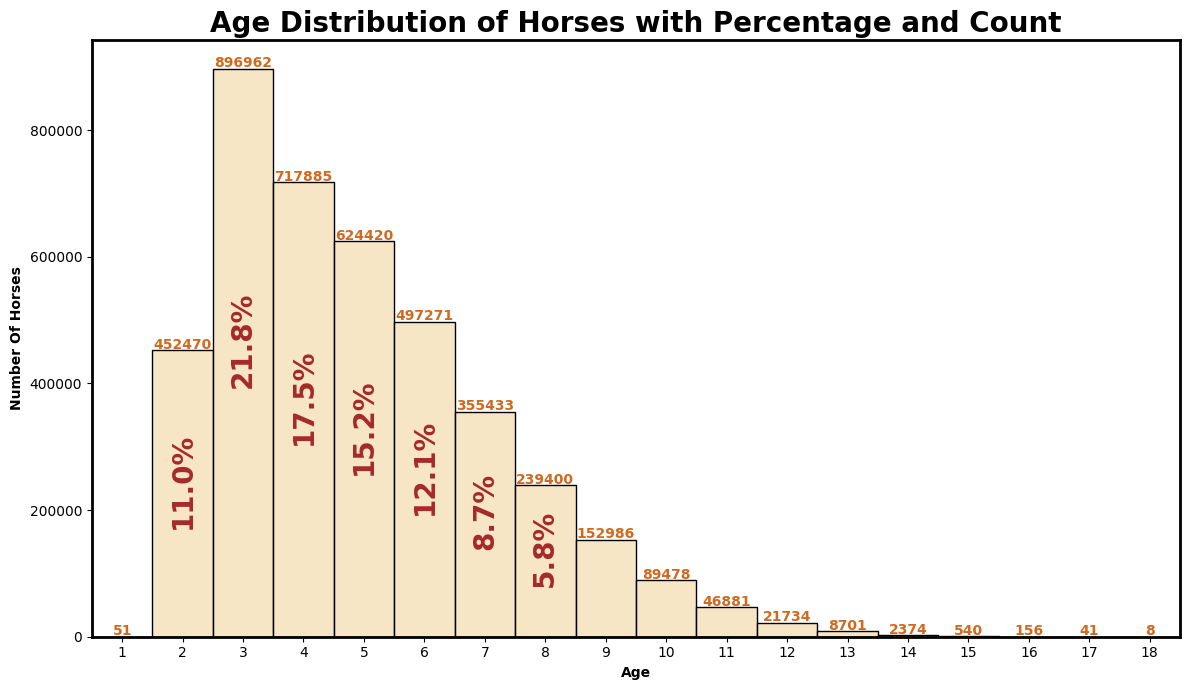

In [ ]:


# Remove duplicates based on 'rid' and 'horseName' columns
unique_horses_data = horses_data.drop_duplicates(subset=['rid', 'horseName'])

# Calculate the bins and bin centers
bins = list(range(int(unique_horses_data['age'].min()), int(unique_horses_data['age'].max()) + 2))  # +2 to include the last edge
bin_centers = 0.5 * (pd.Series(bins[:-1]) + pd.Series(bins[1:]))

# Calculate the number of horses in each bin
age_counts = unique_horses_data['age'].value_counts().reindex(range(int(unique_horses_data['age'].min()), int(unique_horses_data['age'].max()) + 1), fill_value=0)
age_counts = age_counts.sort_index()

# Calculate the total number of horses
total_horses = age_counts.sum()

# Calculate the percentage of horses in each bin
age_percentages = (age_counts / total_horses) * 100

# Define custom colors
custom_colors = ["#E7E8D8", "#EECEB9", "#F0A8D0", "#E3A5C7", "#BB9AB1", "#987D9A"]
# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Normalize percentages for color mapping
norm_percentages = (age_percentages - age_percentages.min()) / (age_percentages.max() - age_percentages.min())
colors = cmap(norm_percentages)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=0, vmax=100))
sm.set_array([])

# Plot Age Distribution
plt.figure(figsize=(12, 7))
ax = sns.histplot(unique_horses_data['age'], bins=bins, kde=False, color='wheat', ax=plt.gca())

# Add annotations in the middle and on top of each bar
for p in ax.patches:
    age_bin = int(p.get_x() + p.get_width() / 2)
    height = p.get_height()
    count = age_counts.get(age_bin, 0)
    percentage = age_percentages.get(age_bin, 0)

    # Percentage inside the bar
    if percentage > 5:
        percentage_text = f'{percentage:.1f}%'
    else:
        percentage_text = ''

    # Annotation inside the bar
    ax.annotate(percentage_text,
                (p.get_x() + p.get_width() / 2., height / 2),  # Place text in the middle of each bar
                ha='center', va='center',  # Center the text
                xytext=(0, 9),
                textcoords='offset points',
                rotation=-270,
                fontsize=20, weight='bold', color='brown')

    # Annotation on top of the bar
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='top',
                xytext=(0, 9),  # Slightly above the top of the bar
                textcoords='offset points',
                fontsize=10, weight='bold', color='chocolate')


# Make the plot borders bold
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the border line width
    spine.set_edgecolor('black')  # Set the border color
# Setting the ticks at the center of each bin
plt.xticks(bin_centers, labels=range(int(unique_horses_data['age'].min()), int(unique_horses_data['age'].max()) + 1))

plt.title('Age Distribution of Horses with Percentage and Count', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number Of Horses', fontweight='bold')
plt.xlim([1, 19])
plt.tight_layout()  # Adjust layout to fit the plot
plt.savefig('age_distribution_with_counts_and_percentages.png')
plt.show()


### **Top 10 Trainers Bar Plot**
#### There is a general trend where trainers with a high number of trained horses tend to have a slightly lower win percentage, possibly due to the challenges of managing a large number of horses. The graph effectively highlights the balance between quantity (number of trained horses) and quality (win percentage) among the top trainers.

<ipython-input-12-ec2ff03666bc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=trainer_stats['Total Horses'], y=trainer_stats.index,palette=colors)
<ipython-input-12-ec2ff03666bc>:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bar_plot = sns.barplot(x=trainer_stats['Total Horses'], y=trainer_stats.index,palette=colors)
<ipython-input-12-ec2ff03666bc>:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


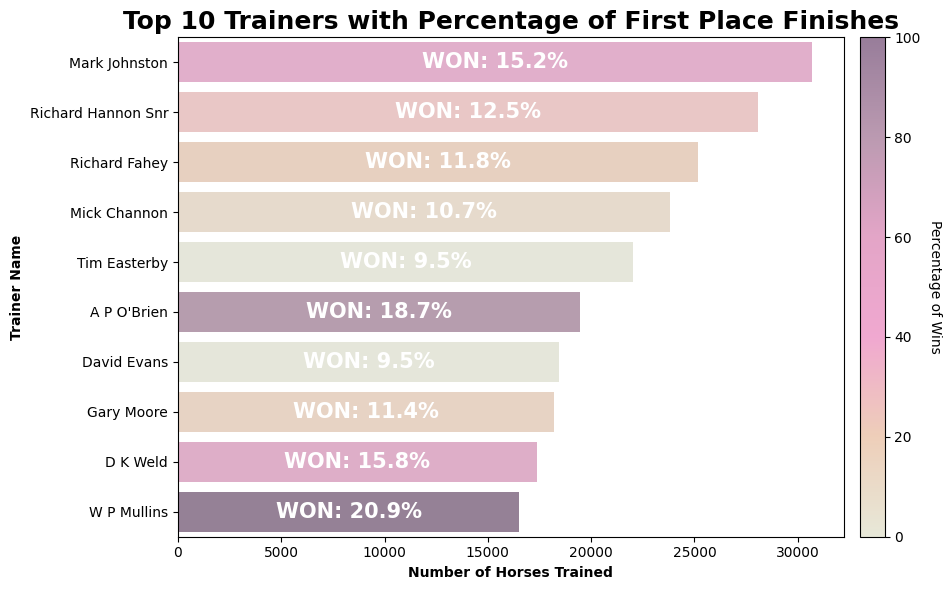

In [ ]:


# Get the top 10 trainers based on the number of horses trained
top_trainers = horses_data['trainerName'].value_counts().head(10)

# Filter the data to include only rows where the position is 1
winners = horses_data[horses_data['position'] == 1]

# Count the number of wins for each trainer
trainer_wins = winners['trainerName'].value_counts()

# Merge the top trainers with the number of wins
trainer_stats = pd.DataFrame({
    'Total Horses': top_trainers,
    'Wins': trainer_wins.reindex(top_trainers.index, fill_value=0)
})

# Calculate the percentage of wins
trainer_stats['Percentage'] = (trainer_stats['Wins'] / trainer_stats['Total Horses']) * 100

# Define your custom colors
custom_colors = ["#E7E8D8",  "#EECEB9","#F0A8D0", "#E3A5C7", "#BB9AB1", "#987D9A"]
# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

norm_percentages = (trainer_stats['Percentage'] - trainer_stats['Percentage'].min()) / (trainer_stats['Percentage'].max() - trainer_stats['Percentage'].min())

# Generate colors for the bars
colors = cmap(norm_percentages)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=0, vmax=100))
sm.set_array([])

# Plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=trainer_stats['Total Horses'], y=trainer_stats.index,palette=colors)

# Add percentage annotations in the middle of each bar
for index, value in enumerate(trainer_stats['Percentage']):
    bar_plot.text(
        trainer_stats['Total Horses'].iloc[index] / 2,  # x position (center of the bar)
        index,  # y position
        f'WON: {value:.1f}%',  # text
        va='center',  # vertical alignment
        ha='center',  # horizontal alignment
        fontsize=15,  # Font size
        weight='bold',
        color='white'
    )

# Add color bar
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Percentage of Wins', rotation=270, labelpad=15)
cbar.ax.yaxis.set_ticks_position('right')

plt.title('Top 10 Trainers with Percentage of First Place Finishes', fontsize=18, fontweight='bold')
plt.xlabel('Number of Horses Trained', fontweight='bold')
plt.ylabel('Trainer Name', fontweight='bold')
plt.tight_layout()  # Adjust layout to fit the plot
plt.savefig('top_trainers_with_percentages.png')
plt.show()


### **Performance Analysis of Top 5 Trainers: Wins and Races Over the Years**
#### There is a general correlation between the number of races a particular trainer participates in and the number of their wins, but it is not always a precise match. For example, in some years, there are many races but relatively few wins.

In [ ]:
# Find the top 5 trainers based on their overall count
top_5_trainers = merged_data['trainerName'].value_counts().head(5).index

# Filter data for the top 5 trainers
top_5_data = merged_data[merged_data['trainerName'].isin(top_5_trainers)]

# Count the wins by trainer and year
wins_by_trainer_year = top_5_data[top_5_data['position'] == 1].groupby(['date', 'trainerName']).size().reset_index(name='wins')

# Count the races by trainer and year
races_by_trainer_year = top_5_data.groupby(['date', 'trainerName']).size().reset_index(name='races')

# Create pivot tables for plotting
wins_by_year = wins_by_trainer_year.pivot(index='date', columns='trainerName', values='wins').fillna(0)
races_by_year = races_by_trainer_year.pivot(index='date', columns='trainerName', values='races').fillna(0)

# Define a color map for trainers
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Define a list of colors
color_map = dict(zip(top_5_trainers, colors))

fig = go.Figure()

# Add traces for wins and races with consistent colors
for trainer in top_5_trainers:
    color = color_map[trainer]

    fig.add_trace(go.Scatter(x=wins_by_year.index, y=wins_by_year[trainer],
                             mode='lines+markers',
                             name=f'{trainer} Wins',
                             line=dict(width=2, color=color),
                             marker=dict(size=6, color=color),
                             hovertemplate='<b>Trainer</b>: ' + trainer + '<br><b>Wins</b>: %{y}<extra></extra>'))

    fig.add_trace(go.Scatter(x=races_by_year.index, y=races_by_year[trainer],
                             mode='lines+markers',
                             name=f'{trainer} Races',
                             line=dict(width=2, dash='dash', color=color),
                             marker=dict(size=6, color=color),
                             hovertemplate='<b>Trainer</b>: ' + trainer + '<br><b>Races</b>: %{y}<extra></extra>'))

# Customize the layout
fig.update_layout(title='Wins and Races Over the Years for Top 5 Trainers',
                  title_font=dict(size=30, family='Arial', color='black'),
                  xaxis_title='Year',
                  yaxis_title='Count',
                  legend_title='Trainer Performance',
                  hovermode='x unified',
                  xaxis_title_font=dict(size=14, family='Arial', color='black'),
                  yaxis_title_font=dict(size=14, family='Arial', color='black'),
                  legend=dict(font=dict(size=12)),
                  margin=dict(l=40, r=40, t=60, b=40),
                  width=1400,  # Set the width of the plot
                  height=800,  # Set the height of the plot
                  title_x=0.5)  # Center the title

# Save and show the figure
fig.show()


### **combitation of dataFrame of data horses with condition of RID**

In [ ]:
filtered_data_horses = horses_data.merge(top_trainers, on='trainerName', how='inner')
filtered_data_horses

,rid,horseName,age,isFav,trainerName,jockeyName,position,decimalPrice,saddle,positionL,weight,count
0,38170,Party Prince,6.0,1,D K Weld,Brendan Sheridan,6,0.636364,0.0,NaN,72,17361
1,73238,Rare Holiday,4.0,1,D K Weld,Brendan Sheridan,5,0.555556,0.0,6,69,17361
2,288307,Kiichi,5.0,0,D K Weld,Brendan Sheridan,3,0.125000,0.0,10,66,17361
3,352446,Popular Glen,5.0,0,D K Weld,Brendan Sheridan,5,0.222222,0.0,4,69,17361
4,20568,Bart Owen,5.0,1,D K Weld,Mr T Mullins,1,0.333333,0.0,NaN,77,17361
...,...,...,...,...,...,...,...,...,...,...,...,...
219714,415026,Euro Fou,5.0,0,Tim Easterby,Mr William Easterby,5,0.029412,4.0,.5,66,22013
219715,415060,Skipness,5.0,0,Tim Easterby,Nathan Moscrop,6,0.007937,10.0,8.5,67,22013
219716,415060,Contrebasse,5.0,0,Tim Easterby,Jamie Hamilton,7,0.014925,6.0,4.75,68,22013
219717,415060,Ask The Question,5.0,0,Tim Easterby,Colm McCormack,9,0.007937,3.0,31,67,22013


### **Heatmap of Win Percentages by Race Condition and Trainer**
#### The graph illustrates that a trainer's performance is highly dependent on race conditions.
#### It appears that some trainers, like W P Mullins and David Evans, specialize in certain conditions, achieving significantly higher win rates.   On the other hand, certain conditions such as Muddy, Sloopy, and Frozen are either avoided or less successful for most trainers. Understanding the relationship between a trainer's performance and race conditions can provide a strategic advantage in making predictions for horse races.

<ipython-input-15-26ceb65c8dd2>:44: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



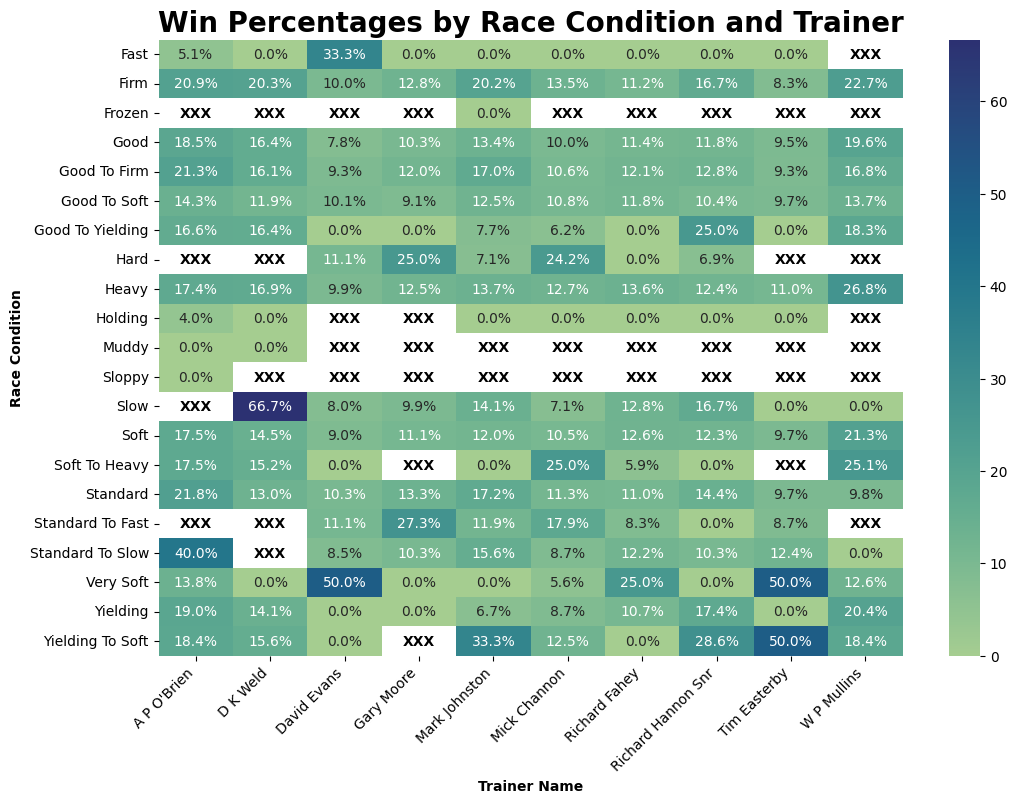

In [ ]:

# Merge filtered horses data with top trainers
filtered_data_horses = horses_data.merge(top_trainers, on='trainerName', how='inner')

# # Merge the filtered horses data with races data to add the condition
filtered_data_horses_condition = filtered_data_horses.merge(races_data[['rid', 'condition']], on='rid', how='inner')

# #
# filtered_data_horses_condition.to_csv('filtered_data_horses_condition.csv', index=False)


# Add a win column (assuming position 1 indicates a win)
filtered_data_horses_condition['win'] = filtered_data_horses_condition['position'] == 1

# Aggregate win counts and total races by trainer and condition
agg_data = filtered_data_horses_condition.groupby(['trainerName', 'condition']).agg(
    wins=('win', 'sum'),
    total_races=('win', 'size')
).reset_index()

# Calculate win percentage
agg_data['win_percentage'] = (agg_data['wins'] / agg_data['total_races']) * 100

# Pivot data for heatmap
heatmap_data = agg_data.pivot_table(
    index='condition',
    columns='trainerName',
    values='win_percentage',
    aggfunc='mean'
)

# Define a custom color palette
custom_palette = sns.color_palette("crest", as_cmap=True)

# Create a mask for missing values
mask = heatmap_data.isnull()

# Define a custom annotation function to add a percentage sign
def annot_format(data):
    return f"{data:.1f}%" if not np.isnan(data) else 'XXX'


# Plot heatmap with percentage annotations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=heatmap_data.applymap(annot_format), fmt='', cmap=custom_palette, cbar=True, annot_kws={"fontsize":10}, mask=mask)


# Manually add 'xxx' for masked cells
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if mask.iloc[i, j]:
            plt.text(j + 0.5, i + 0.5, 'XXX', ha='center', va='center', color='black', fontsize=10, fontweight='bold')


# Manually add 'xxx' for masked cells
plt.title('Win Percentages by Race Condition and Trainer', fontsize=20, fontweight='bold')
plt.xticks(rotation=45,ha='right' , fontsize = 10)
plt.xlabel('Trainer Name', fontweight='bold')
plt.ylabel('Race Condition', fontweight='bold')
plt.savefig('Win Percentages by Race Condition and Trainer.png')
plt.show()

### **Performance of Favorite vs Non-Favorite Horses through the years 1980-2020 :Bar Plot**
#### The graph shows that favorites perform better and often achieve higher placements, while non-favorite horses are primarily positioned in the lower ranks.

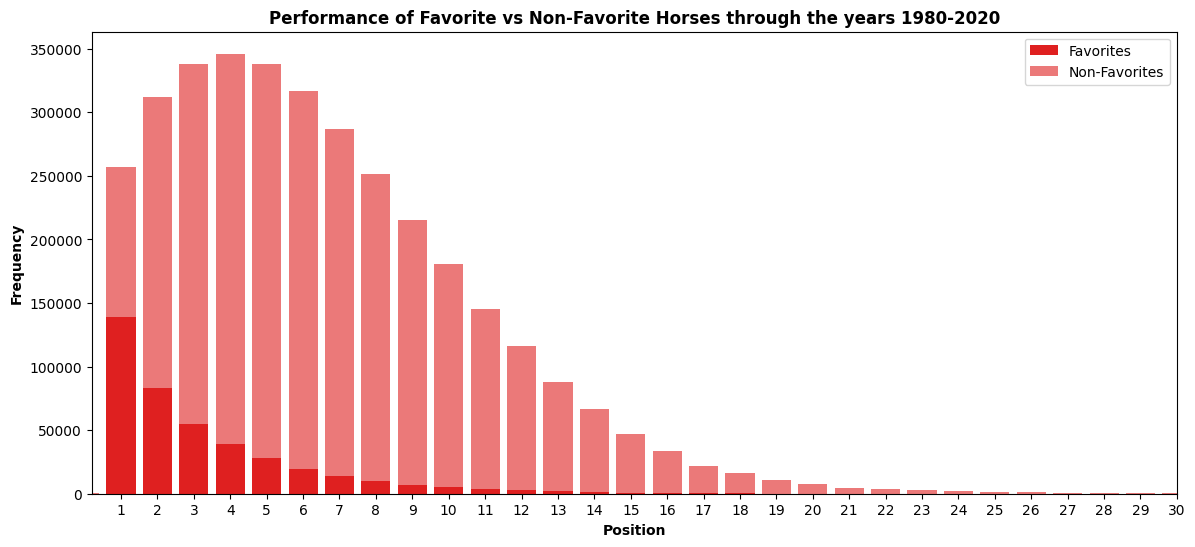

In [ ]:
# Performance of Favorite Horses
plt.figure(figsize=(14, 6))
fav_performance = horses_data[horses_data['isFav'] == True]['position'].value_counts().sort_index()
non_fav_performance = horses_data[horses_data['isFav'] == False]['position'].value_counts().sort_index()
sns.barplot(x=fav_performance.index, y=fav_performance.values, color='red', label='Favorites')
sns.barplot(x=non_fav_performance.index, y=non_fav_performance.values, color='red', label='Non-Favorites', alpha=0.6)
plt.title('Performance of Favorite vs Non-Favorite Horses through the years 1980-2020',weight='bold')
plt.xlabel('Position',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.legend()
plt.xlim([0.2,30])
plt.savefig('performance_favorites.png')
plt.show()


## **Winning Probability vs Age**
X-Axis (Age): This axis shows the age of the horses. Each point on this axis represents a horse's age.

Y-Axis (Predicted Probability): This axis represents the probability of a horse winning the race, as predicted by the logistic regression model. Values closer to 1 indicate a higher probability of winning, while values closer to 0 indicate a lower probability.

Scatter Points: Each point on the graph represents a horse. The position of the point on the x-axis corresponds to the horse’s age, and the position on the y-axis corresponds to the predicted probability of winning.

Color Coding (Hue): The color of each point reflects whether the horse actually won (based on the win column). Typically, colors are mapped such that one color represents wins and another represents losses, making it easy to see the relationship between age and winning probability.

Key Insights
Trends: You might observe trends where certain ages have higher or lower predicted probabilities of winning. For example, if younger horses tend to have higher predicted winning probabilities, it will be evident from the clustering of points.

Distribution: The spread of colors (win/loss) across different ages can give insights into how age affects winning chances.

Clustering: Look for clusters of points with high predicted probabilities and see if they correspond to specific age ranges.

This visualization helps to understand how the likelihood of winning changes with age, based on your model’s predictions.

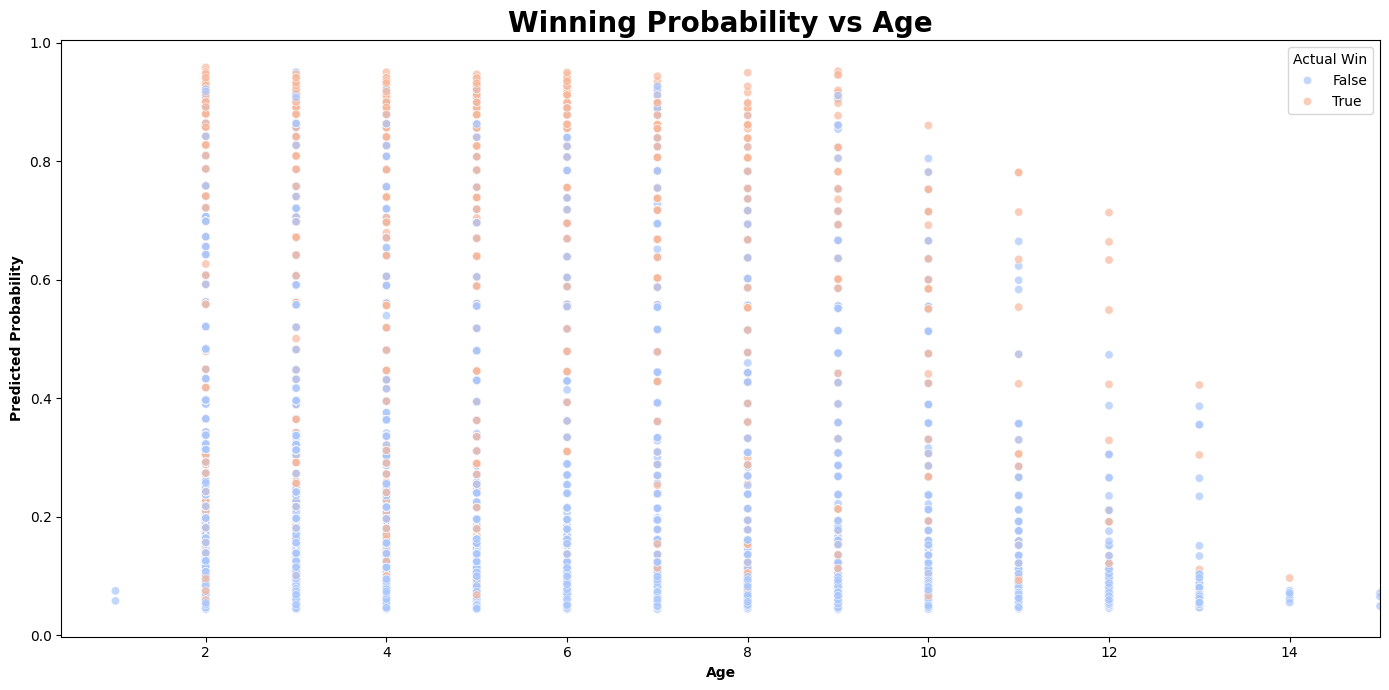

In [ ]:

# Example features and target
features = ['age', 'decimalPrice']  # Use appropriate features
target = 'win'

# Prepare the data
X = filtered_data_horses_condition[features]
y = filtered_data_horses_condition[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_scaled, y)

# Generate predicted probabilities
filtered_data_horses_condition['predicted_prob'] = model.predict_proba(X_scaled)[:, 1]

# Plot predicted probabilities vs. age
plt.figure(figsize=(14, 7))

# Plotting predicted probabilities vs. age
plt.subplot(1, 1, 1)
sns.scatterplot(x=filtered_data_horses_condition['age'], y=filtered_data_horses_condition['predicted_prob'], hue=filtered_data_horses_condition['win'], palette='coolwarm', alpha=0.7)
plt.title('Winning Probability vs Age',fontweight='bold',fontsize = 20)
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Predicted Probability',fontweight='bold')
plt.legend(title='Actual Win', loc='upper right')
plt.xlim([0.4, 15])
plt.tight_layout()
plt.savefig('predicted_winning_probability_age.png')
plt.show()


### **Average Winning Time by Race Condition(seconds)**
#### The chart illustrates a clear relationship between race conditions and winning times, where softer and heavier ground conditions lead to slower race times. Conversely, firmer and faster conditions allow for quicker winning times, demonstrating how different surfaces impact the race pace. This insight can be crucial for trainers, bettors, and race organizers when predicting race outcomes under varying conditions.

<ipython-input-18-40ff07592088>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




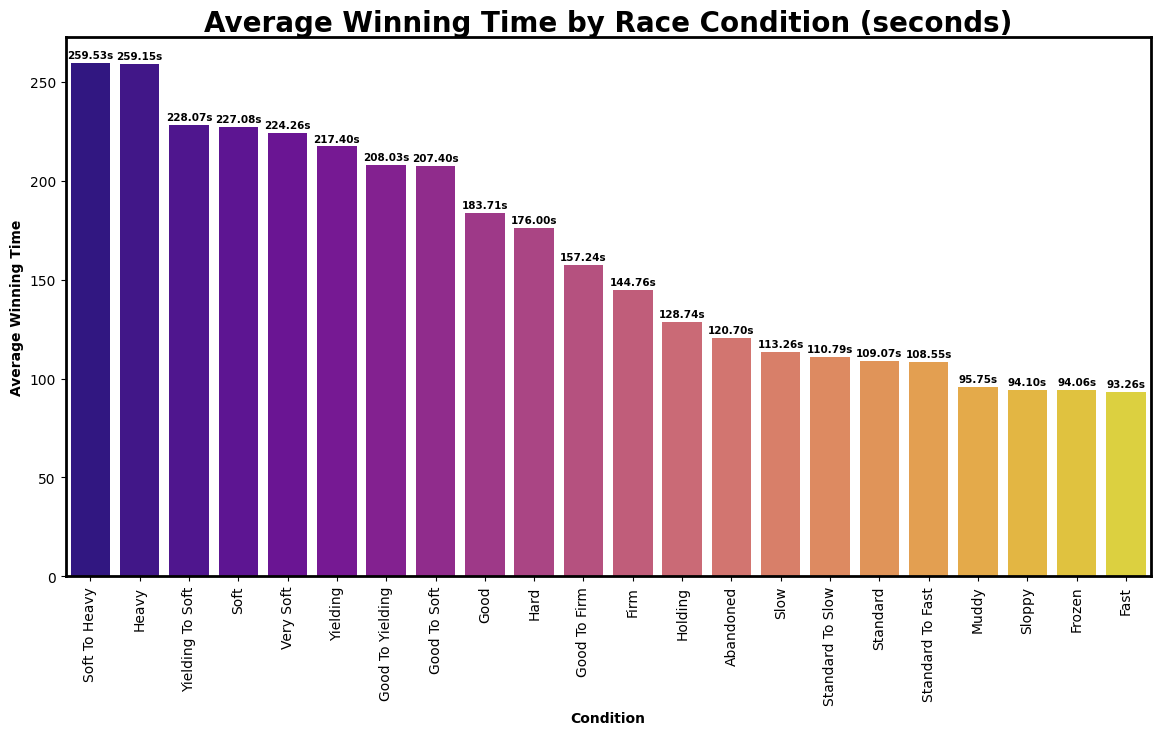

In [ ]:


# Create a column with average winning times for each condition
condition_avg_winning_time = races_data.groupby('condition')['winningTime'].mean().reset_index()

# Sort the DataFrame by average winning time in descending order
condition_avg_winning_time = condition_avg_winning_time.sort_values(by='winningTime', ascending=False)

# Bar plot with numbers above each bar
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='condition', y='winningTime', data=condition_avg_winning_time, palette='plasma')

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}s',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='top',
                xytext=(0, 9),
                fontweight='bold',
                fontsize=7.5,
                textcoords='offset points')

# Make the plot borders bold
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the border line width
    spine.set_edgecolor('black')  # Set the border color

plt.title('Average Winning Time by Race Condition (seconds)', va='top', fontsize=20, fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Average Winning Time', fontweight='bold')
plt.xticks(rotation=90)
plt.savefig('Average_Winning_Time_by_Race_Condition.png')
plt.show()


In [ ]:
s =  races_data[races_data['condition'] == 'Abandoned']
s['winningTime'].mean()

120.70333333333332

### **Distribution of conditions over all years**
#### The chart shows that track conditions such as Good, Soft, and Standard were the most common over the years, while drier and wetter conditions were less frequent.

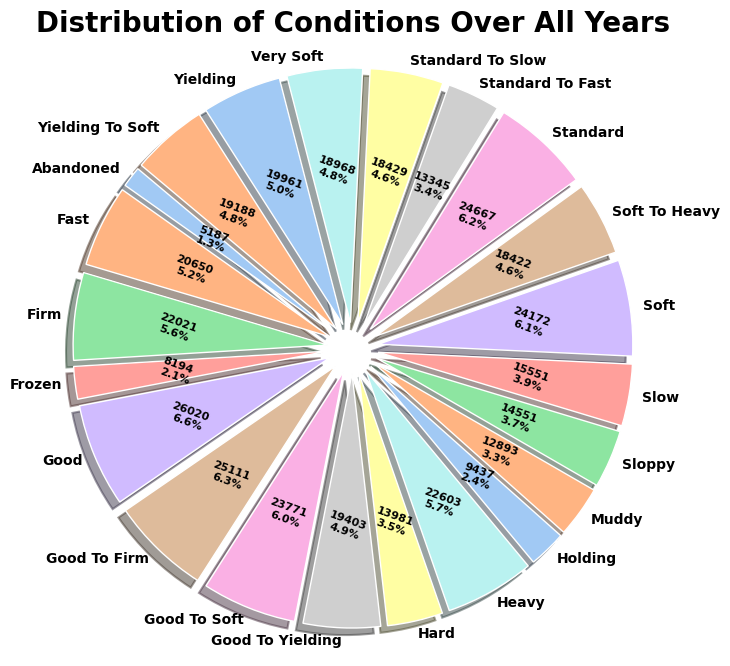

In [ ]:


# Count the total number of occurrences by 'condition'
condition_counts_df = races_data.groupby('condition').size().reset_index(name='count')

# Remove categories with negligible numbers
filtered_condition_counts = condition_counts_df[condition_counts_df['count'] > 0]

# Define a color palette for the pie chart
color_palette = sns.color_palette("pastel", len(filtered_condition_counts) + 8)

# Prepare the data for logarithmic transformation
log_transformed_counts = np.log1p(filtered_condition_counts['count'])

# Function to format labels with absolute count and percentages
def format_label(pct, counts):
    absolute_count = int(np.round(pct / 100. * np.sum(counts)))
    return f"{absolute_count}\n{pct:.1f}%"

# Set the distance between pie slices
explode = [0.1] * len(filtered_condition_counts)  # Distance between slices

# Create the pie chart with a logarithmic scale
plt.figure(figsize=(14, 8))
wedges, labels_texts, percentages_texts = plt.pie(
    log_transformed_counts,
    labels=filtered_condition_counts['condition'],
    startangle=140,
    colors=color_palette,
    autopct=lambda pct: format_label(pct, filtered_condition_counts['count']),
    textprops=dict(color="black", fontsize=10, fontweight='bold'),
    wedgeprops=dict(edgecolor='w', linewidth=1.5),  # Add border lines to the slices
    labeldistance=1.05,  # Adjust this value to move labels closer or farther from the pie
    shadow=True,  # Add shadows to the slices
    explode=explode  # Add distance between the slices
)

# Adjust the labels
for wedge in wedges:
    wedge.set_edgecolor('w')  # White border lines
    wedge.set_linewidth(1)  # Line thickness

for percentage_text in percentages_texts:
    percentage_text.set_fontsize(8)  # Adjust font size
    percentage_text.set_rotation(-20)  # Adjust rotation

plt.title('Distribution of Conditions Over All Years', fontsize=20, fontweight='bold')
plt.axis('scaled')  # Ensure the chart is displayed circularly
plt.savefig('Distribution_of_Conditions_Over_All_Years.png')

plt.show()


# **Correlation Matrix**
This matrix shows the pairwise correlation coefficients between numerical features, indicating how strongly pairs of features are related:

**age vs. weight:** Correlation is 0.504. This moderate positive correlation suggests that as horses get older, their weight tends to increase.

**age vs. position:** Correlation is -0.060. This weak negative correlation indicates a very slight tendency for older horses to have slightly worse positions, though the relationship is not strong.

**age vs. positionL:** Correlation is 0.181. This weak positive correlation suggests a slight tendency for older horses to have higher positionL values.

**weight vs. position:** Correlation is -0.105. This weak negative correlation indicates a slight tendency for heavier horses to have slightly worse positions.

**weight vs. positionL:** Correlation is 0.264. This weak to moderate positive correlation suggests that heavier horses may have slightly better positionL values.

**position vs. positionL:** Correlation is 0.087. This very weak positive correlation suggests a slight tendency for better positions to correspond with higher positionL values.

**Summary**
The dataset shows variability in age, weight, and position.
Correlations between age, weight, and position suggest some relationships, but none are very strong.
Be cautious about potential errors in age and weight, as the minimum values (0 or negative) may indicate data quality issues.
This analysis provides a foundational understanding of your dataset’s characteristics and relationships.

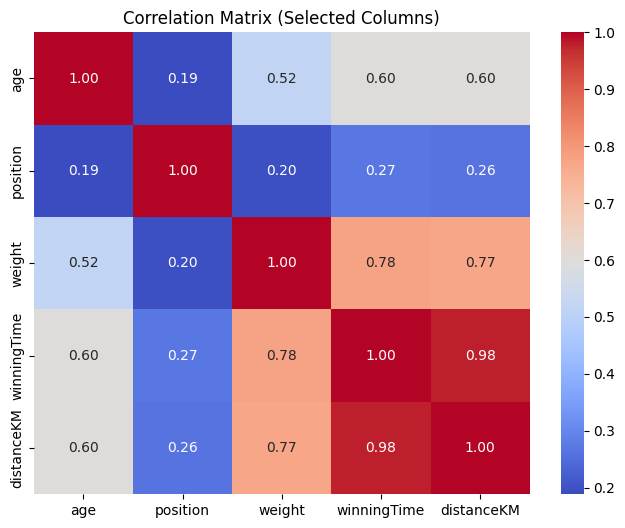

In [ ]:


# Selecting the desired columns
selected_columns = merged_data[['age', 'position', 'weight', 'winningTime', 'distanceKM']]

# Creating a correlation matrix
correlation_matrix = selected_columns.corr()

# Displaying the matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

### **Decision Tree Analysis for Predicting Race Wins:**
#### The decision tree indicates that recent performance (a winning streak) is the most critical factor in predicting race outcomes, followed by age and whether the horse is favored. A strong winning streak generally increases the likelihood of continued success, but younger horses or favorites can occasionally perform better under certain conditions, even without a strong winning history.

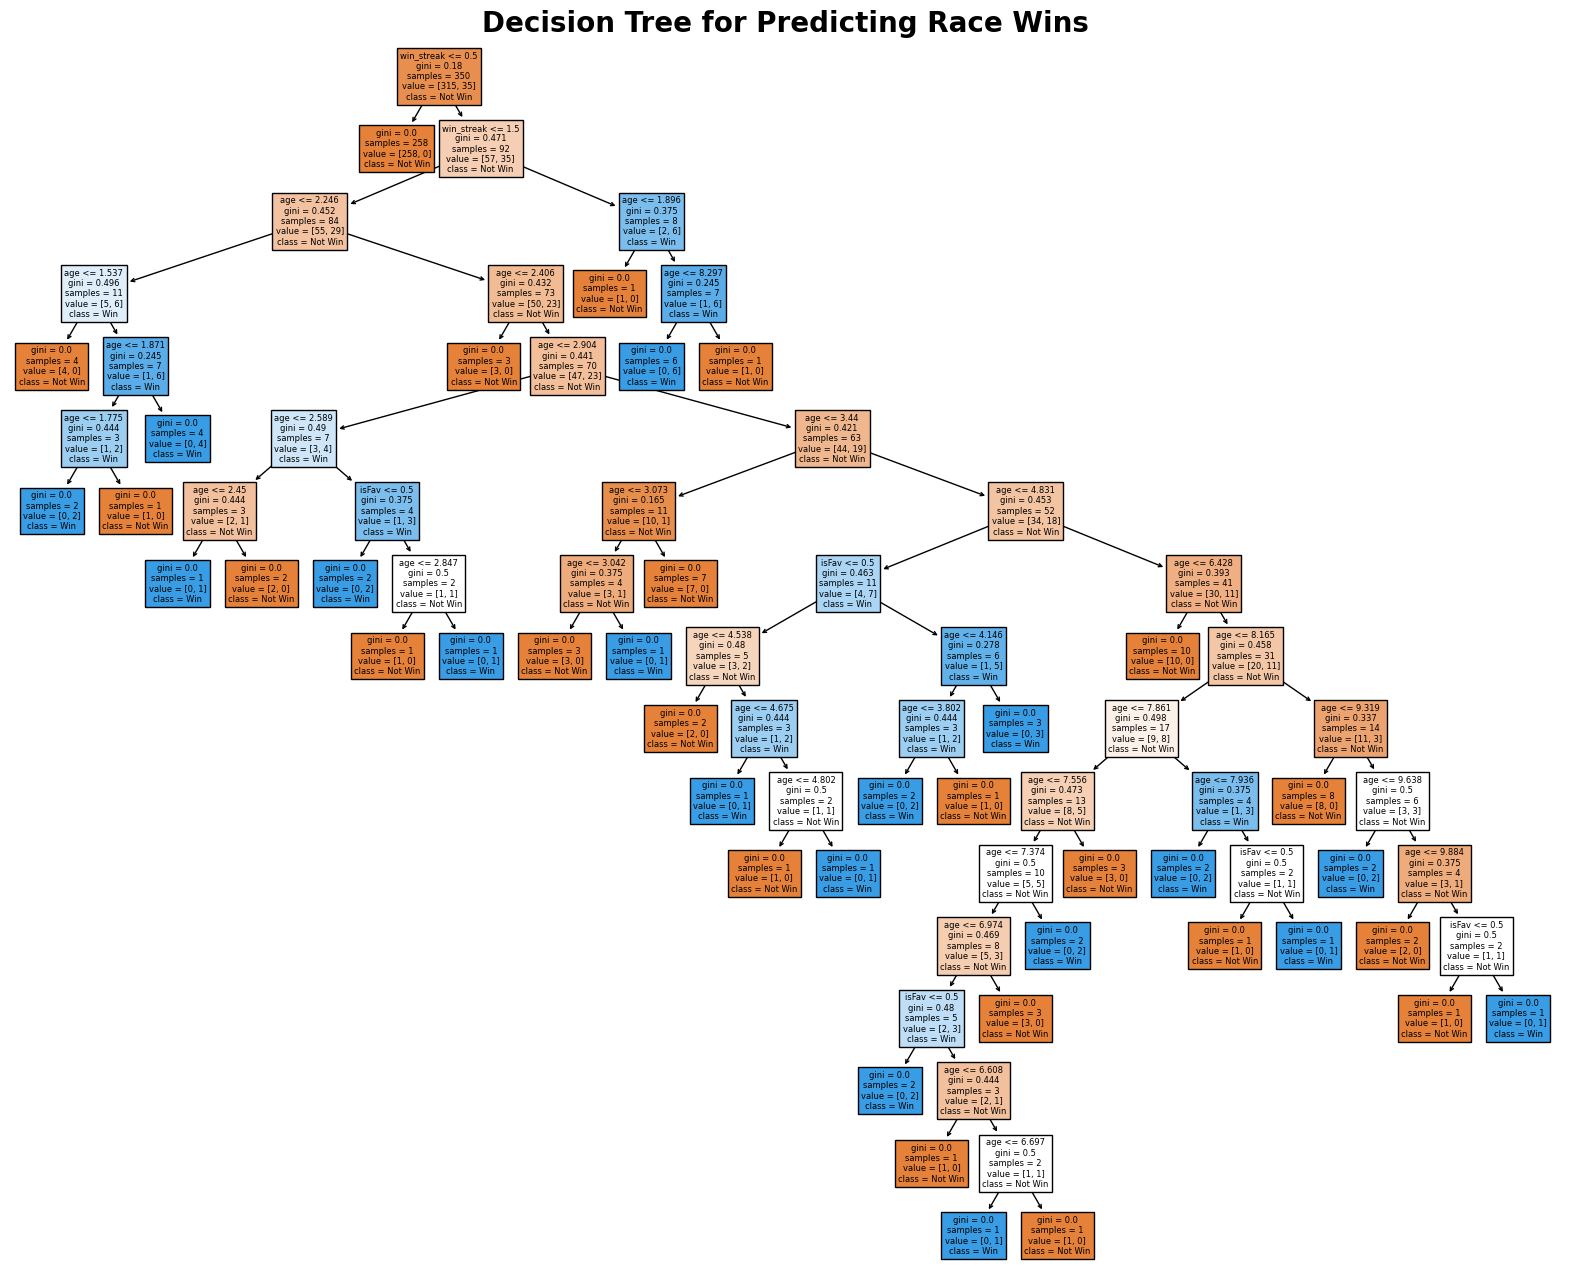

Accuracy: 0.87
Precision: 0.50
Recall: 0.35
Confusion Matrix:
[[123   7]
 [ 13   7]]


In [ ]:


# Example synthetic data for illustration (replace with your actual data)
np.random.seed(42)
num_races = 500
horse_names = [f'Horse_{i}' for i in range(50)]  # 50 unique horses
horse_name_series = np.random.choice(horse_names, num_races)  # Randomly assign horses to races
distance = np.random.uniform(1000, 3500, num_races)  # race distance in meters
age = np.random.uniform(1, 10, num_races)  # horse age in years
conditions = np.random.choice(['Soft', 'Heavy', 'Good', 'Firm', 'Yielding'], num_races)
is_fav = np.random.randint(0, 2, num_races)  # whether the horse is the favorite (1: yes, 0: no)
position = np.random.randint(1, 10, num_races)  # Horse finishing positions
dates = pd.date_range(start='2020-01-01', periods=num_races, freq='D')  # Race dates

# Create the DataFrame
decision_tree = pd.DataFrame({
    'horseName': horse_name_series,
   # 'distance': distance,
    'age': age,
    'condition': conditions,
    'isFav': is_fav,
    'position': position,
    'date': dates
})

# Step 1: Sort the data by horseName and date
decision_tree = decision_tree.sort_values(by=['horseName', 'date'])

# Step 2: Add a win column (assuming position 1 indicates a win)
decision_tree['win'] = decision_tree['position'] == 1

# Step 3: Calculate win streaks (number of wins in the last `n` races)
def calculate_win_streak(group, n=3):
    # Rolling window to calculate the number of wins in the last n races
    group['win_streak'] = group['win'].rolling(window=n, min_periods=1).sum()
    return group

# Apply the function to each horse
decision_tree = decision_tree.groupby('horseName').apply(calculate_win_streak)

# Step 4: Prepare the feature set and target
features = ['age', 'isFav', 'win_streak']  # Including the win streak feature
target = 'win'

X = decision_tree[features]
y = decision_tree[target]

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = clf.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 9: Plot the Decision Tree
plt.figure(figsize=(20, 16))
plot_tree(clf, feature_names=X.columns, class_names=['Not Win', 'Win'], filled=True)
plt.title('Decision Tree for Predicting Race Wins',fontweight ='bold',size = 20)
plt.show()

# Step 10: Output metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


### **3D Scatter Plot of Horse Age, Weight, and Race Position with Interactive Hover Data and Animation**
#### The 3D graph shows the relationship between age, weight, and race position, and allows to examine the effect of these variables across different age groups.

In [ ]:

fig = px.scatter_3d(horses_data[:150],
                    x='position',
                    y='weight',
                    z='age',
                    color='horseName',    # Color by horse name
                    hover_name='horseName',
                    range_x=[1, 10],       # X-axis range: Age from 1 to 10
                    range_y=[50, 80],      # Y-axis range: Weight from 0 to 80
                    range_z=[1,10],       # Z-axis range: Position from 1 to 10
                    labels={'age': 'Horse Age', 'weight': 'Horse Weight', 'position': 'Race Position'}, # Rename axis labels
                    animation_frame='age', # Optional: Create animation frames based on the age of the horse
                    hover_data=['jockeyName', 'isFav'], # Additional hover data: Jockey name and whether the horse is a favorite
                    symbol='isFav', # Symbol by trainer's name

                    width=1200,             # Width of the plot
                    height=900,            # Height of the plot
                    title='Horse Age, Weight, and Position')

fig.show()

